# <center> DOMACI ZADATAK 2 </center>

In [47]:
# Centriranje slika
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

## Ucitavanje, podela i standardizacija podataka

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [49]:
# Ucitavanje podataka iz .csv fajla
data = pd.read_csv('multiclass_data.csv', header = None)

# Podela na matricu X koja sadrzi kolone prediktora i vektor y 
X_df = data.iloc[:,:-1] 
X = X_df.to_numpy()
y = data.iloc[:,-1].to_numpy()
y = np.resize(y, (len(y), 1)) 

# Dimenzije matrice X
m, n = X.shape

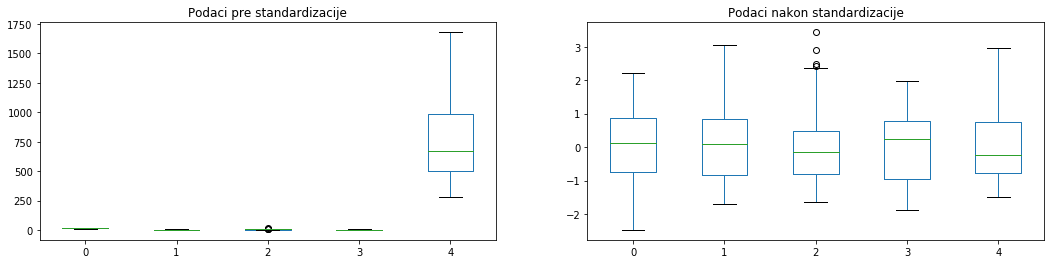

In [50]:
# Proveravanje da li se vrednosti prediktora nalaze u slicnim opsezima
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 4))
X_df.plot(kind = 'box', ax = axes[0], title = 'Podaci pre standardizacije')

# Obzirom da poslednji prediktor ima mnogo veci opseg treba da se uradi standardizacija
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_df_scaled = pd.DataFrame(X_scaled)
X_df_scaled.plot(kind='box', ax = axes[1], title = 'Podaci nakon standardizacije')

In [51]:
# Sad moze da se doda kolona jedinica matrici X
ones_column = np.ones((m, 1))
X_scaled = np.concatenate((ones_column, X_scaled), axis = 1)   
m, n = X_scaled.shape

## 1. Logisticka Regresija

<font size="3">

Kako je ovo problem sa više od dve klase, koristi se metod "jedan-protiv-ostalih", odnosno umesto vektora labela $y$ dimenzija $[m x 1]$ ovde postoji matrica labela $y$ dimenzija $[m x k]$, gde je $k$ broj klasa. Nova matrica $y$ sadrži samo 0 i 1 i to u prvoj koloni jedinice tamo gde su u originalu bile nule, u drugoj koloni tamo gde su originalu bile jedinice i u trećoj tamo gde su u originalu bile dvojke.
    
<br/> Parametri se uče masksimizacijom verodostojnosti. Postupak je na dalje isti kao kod logističke regresije sa dve klase, samo što će $\theta$ biti dimenzija $[n x k]$, a dimenzija matrice hipoteza $[m x k]$. Predikcija jednog podatka iz test skupa će biti ona za koju je maksimalna vrednost hipoteze. Hipoteza se računa kao sigmoid od standardnog oblika hipoteze, dok se kriterijumska funkcija i gradijent računaju kao:

<br/> $$ h_{\theta}(\bf{x}) = \frac{1}{1 + e^{\bf{x} \cdot \theta}} $$
<br/> $$ J(\theta) = y^{T}\cdot \ln{h_{\theta}(\bf{x})}+(1 - y)^{T}\cdot\ln{(1-h_{\theta}(\bf{x}))} $$
<br/> $$ \nabla J(\theta) = \frac{1}{m} \bf{x}^{T}\cdot(\bf{x}\theta - y)$$
<br/> $$ \theta = \theta - \alpha \cdot \nabla J(\theta) $$
    
<br/> Obzirom da treba da se prikažu funkcije gubitka u zavisnosti od iteracije za tri različite vrednosti stope učenja $\alpha$, očekuje se da će vrednosti ovih funkcija opadati. Kako se zadaju maksimalan broj iteracija i tolerancija, krive će prestati sa iscrtavanjem ukoliko je razlika izmedju dve susedne vrednosti kriterijumske funkcije manja od vrednosti tolerancije. Tako u slučaju sa većom vrednošću $\alpha$ dolazi do bržeg konvergiranja, pa nema potrebe da se izvrše sve iteracije.
    
</font>

In [33]:
# Obzirom da skup podataka pripada trima klasama, vektor y mora da se formira na drugi nacin
from Zadatak1 import make_new_y

y_all = make_new_y(y)

# Podela na trenirajuci i testirajuci skup
from sklearn.model_selection import train_test_split

X_train, X_test, y_all_train, y_all_test, y_train, y_test  = train_test_split(X_scaled, y_all, y, random_state = 4,
                                                                              test_size = 0.33)

Tacnost predikcije je:  0.9661016949152542


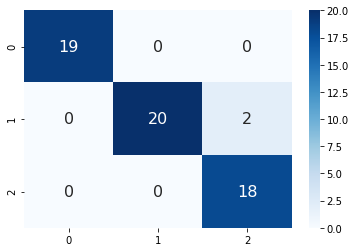

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sn
from Zadatak1 import Logistic_Regression

# Pravi se objekat klase Logistic_Regression sa odredjenim parametrima 
model = Logistic_Regression(alpha = 0.1, Niter = 1000, tol = 0.001)

J_class = []
theta_class = np.empty([n, 1])
classes = np.unique(y)

for i in range(0, len(classes)):    
    model.fit(X_train, y_all_train[:,i])
    J_class.append(model.all_cost)
    theta_class = np.append(theta_class, model.last_theta, axis = 1)  
theta_class = theta_class[:, 1:]

# Predikcija i racunanje tacnosti
y_pred_lr = model.predict(X_test, theta_class)
acc_lr = accuracy_score(y_test, y_pred_lr)
print('Tacnost predikcije je: ', acc_lr )

# Plotovanje konfuzione matrice
conf_mat_lr = confusion_matrix(y_test, y_pred_lr)
conf_mat_lr_df = pd.DataFrame(conf_mat_lr)
sn.heatmap(conf_mat_lr_df, annot=True, annot_kws={"size": 16}, cmap = 'Blues') 

In [35]:
# Cuvanje vrednosti kriterijumske funkcije za 0 klasu kada alfa ima 3 razlicite vrednosti
alphas = [0.01, 0.1, 1]
J_alpha = []
which_class = 0

for a in alphas:
    model = Logistic_Regression(alpha = a, Niter = 1000, tol = 0.001)
    
    J_class = []
    theta_class = np.empty([6, 1])
    
    for i in range(0, len(classes)):    
        model.fit(X_train, y_all_train[:,i])
        J_class.append(model.all_cost)
        theta_class = np.append(theta_class, model.last_theta, axis = 1)
        
    J_alpha.append(J_class[which_class])    
    theta_class = theta_class[:, 1:]

Text(0.5, 1.0, 'Zavisnost kriterijumske funkcije od iteracije za 0 klasu')

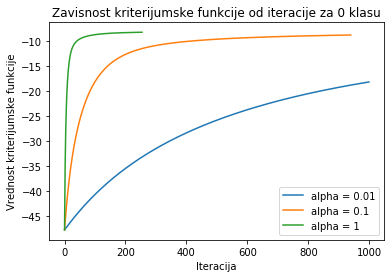

In [36]:
# Plotovanje krivih za 0 klasu kada alfa ima 3 razlicite vrednosti
plt.figure()

for i in range(0,len(alphas)):
    x = np.arange(len(J_alpha[i])).reshape((len(J_alpha[i]),1))
    plt.plot(x, np.array(J_alpha[i])[:, 0])
plt.xlabel('Iteracija')
plt.ylabel('Vrednost kriterijumske funkcije')
plt.legend(['alpha = ' + str(alphas[0]), 'alpha = ' + str(alphas[1]), 'alpha = ' + str(alphas[2])])
plt.title('Zavisnost kriterijumske funkcije od iteracije za ' + str(which_class) + ' klasu')

## 2. Softmax

<font size="3">
    
Softmax je generalizacija logističke funkcije, primenjuje kod klasifikacije i može se koristiti za proizvoljan broj klasa. Softmax funkcija konvertuje realne vrednosti ulaza u vrednosti iz opsega $[0, 1]$ pri čemu je suma svih izlaznih vrednosti jednaka jedinici. Ulazi su u ovom slučaju hipoteze, a izlazi $\phi_{i}$, pri čemu je u pitanju $i$-ta klasa. Parametri se uče maksimizacijom verodostojnosti i u ovom slučaju se koristi stohasticki mini-batch gradijentni spust kao metoda optimizacije. Parametar $\bf{\Theta}$ je matrica dimenzija $[n x k]$, gde je $n$ broj kolona matrice $X$, a $k$ broj klasa, dok je $\theta_{i}$ $i$-ta kolona ove matrice. Ovaj parametar se ažurira nakon računanja vrednosti gradijenta na podskupu.
<br/>  
</font>

<font size="5">

$$ \phi_{i} = \frac{e^{\theta^{T}_{i}\bf{x}}}{\sum_{j=1}^{k} e^{\theta^{T}_{j}\bf{x}}} $$
    
</font>

<font size="3">
    
<br/> Klasa $\bf{Softmax}$ sadrži nekoliko metoda i atributa. Jedna od metoda jeste *make_batches(X, y, size)* i ona formira parove $(X^{(i)}, y^{(i)})$ koju su podskupovi istih veličina (osim možda poslednjeg ukoliko ukupan broj podataka nije deljiv zadatom veličinom). Prilikom svake iteracije podaci se permutuju, pa se tek onda formiraju podskupovi. Računanje kriterijumske funkcije i gradijenta je uradjeno kako je i pokazano u tekstu zadatka. U metodi *fit(X, y)* je implementiran stohastički mini-batch gradijentni sput, a metoda *predict(X)* koristi poslednje $\theta$ dimenzija [n x k], računa hipotezu za svaki primer koja se sastoji iz onoliko elemenata koliko ima klasa, tj. $k$ i medju njima traži poziciju maksimuma. Ta pozicija je ujedno i pripadnost klasi. 

<br/><br/> Obzirom da se traži prikaz funkcije gubitaka kroz iteracije za tri različite veličine podskupa, očekuje se da ukoliko je veličina manja ova funkcija izgleda vise "zašumljeno", a ukoliko je veća, mirnije prirode. Ovde su uzete veličine od 5, 10 i 20 podataka u podskupu.   

</font>

In [37]:
from Zadatak2 import Softmax

# Formiranje objekta klase Softmax
model_softmax = Softmax(alpha = 0.1, Niter = 20, batch_size = 10)

# Trazenje teta, formirane istorije vrednosti kriterijumske funkcije i potom predikcija na test skupu
model_softmax.fit(X_train, y_train)
y_pred_soft = model_softmax.predict(X_test)

Tacnost je:  0.9830508474576272


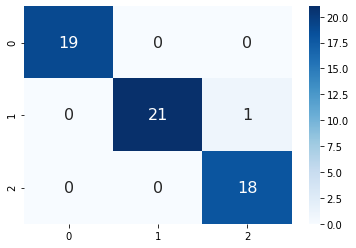

In [38]:
# Rezultati dobijeni izabranom velicinom podskupa (mini batch-a) -> Tacnost i konfuziona matrica
acc_soft = accuracy_score(y_test, y_pred_soft)
print('Tacnost je: ', acc_soft)

# Plotovanje konfuzione matrice
conf_mat_soft = confusion_matrix(y_test, y_pred_soft)
conf_mat_soft_df = pd.DataFrame(conf_mat_soft)
sn.heatmap(conf_mat_soft_df, annot=True, annot_kws={"size": 16}, cmap = 'Blues') 

In [39]:
# Ponasanje kriterijumske funkcije za tri razlicite vrednosti velicine podskupa
m_train = X_train.shape[0]
print('Veličina obučavajućeg skupa: ', m_train)

J_all = []
sizes = [5, 10, 20]
for size in sizes:
    model_softmax = Softmax(alpha = 0.1, Niter = 20, batch_size = size)
    model_softmax.fit(X_train, y_train)
    J_all.append(model_softmax.J)  

Veličina obučavajućeg skupa:  119


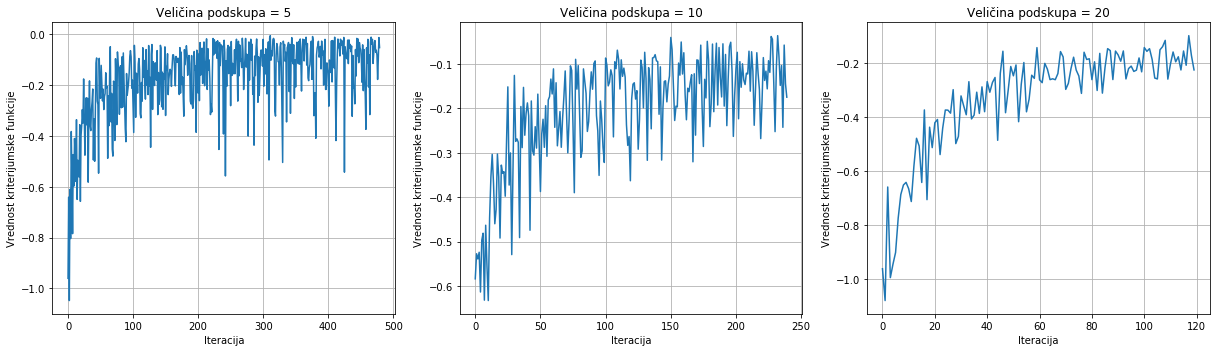

In [40]:
# Plotovanje krivih za 0 klasu kada alfa ima 3 razlicite vrednosti
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (17, 5))

for i in range(0,len(sizes)):
    x = np.arange(len(J_all[i])).reshape((len(J_all[i]),1))
    axes[i].plot(x, np.array(J_all[i])[:])
    axes[i].grid()
    axes[i].title.set_text('Veličina podskupa = ' + str(sizes[i]))
    axes[i].set_xlabel('Iteracija')
    axes[i].set_ylabel('Vrednost kriterijumske funkcije')
plt.tight_layout()    

## 3. Generativni algoritmi

### 3.1. Gaussovska Diskriminantna Analiza (GDA)

<font size="3">

U ovom slučaju labele $y$ imaju kategoričku raspodelu, $n$ prediktora $x_{j}$ Gaussovsku, pa je samim tim i raspodela $x|y$ Gaussovska sa parametrima $\Sigma$ i $\mu$ koji se razlikuju u zavisnoti od labele, odnosno klase kojoj primer pripada. Verodostojnost se računa pomocu Bayesove formule, a parametri raspodele se uće maksimizacijom log-verodostojnosti.
    
<br/> Metode *fit(X, y)* iz klase GDA radi tako što za svaku klasu pojedinačno računa parametre, čuva raspodele sa ovim parametrima i računa i čuva apriornu verovatnoću $P(y)$. Svaka srednja vrednost je dimenzija $[1 x n]$,a svaka kovarijaciona matrica $[n x n]$, pa je i raspodela višedimenziona. Metoda *predict(X)* računa verodostojnost za svaki primer, traži najveću medju njima i tako primeru dodeljuje pripadnost klasi.

</font>

In [41]:
# Podacima ne treba dodavati jedinicnu kolonu matrici X, pa se ovde podaci opet ucitavaju
data = pd.read_csv('multiclass_data.csv', header = None)

# Podela na matricu X koja sadrzi kolone prediktora i vektor y 
X_df = data.iloc[:,:-1] 
X = X_df.to_numpy()
y = data.iloc[:,-1].to_numpy()
y = np.resize(y, (len(y), 1)) 

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Podela na obucavajuci i testirajuci skup
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.33, random_state = 4)

In [42]:
from Zadatak3 import GDA

# Formiranje objekta klase GDA
model_GDA = GDA()

# Fitovanje i predikcija
model_GDA.fit(X_train, y_train)
y_pred_gda = model_GDA.predict(X_test)

Tacnost predikcije je:  0.9830508474576272


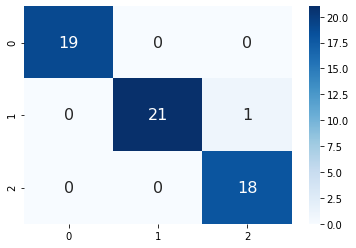

In [43]:
# Rezultati predikcije
acc_gda = accuracy_score(y_test, y_pred_gda)
print('Tacnost predikcije je: ', acc_gda)

# Plotovanje konfuzione matrice
conf_mat_gda = confusion_matrix(y_test, y_pred_gda)
conf_mat_gda_df = pd.DataFrame(conf_mat_gda)
sn.heatmap(conf_mat_gda_df, annot=True, annot_kws={"size": 16}, cmap = 'Blues') 

### 3.2.  Gaussovski Naivni Bayesov klasifikator

<font size="3"> 
Naivni Bayesov klasifikator na samom početku usvaja pretpostavku da su prediktori medjusobno nezavisni kada je data labela. Labela $y$ ima kategoričku raspodelu i u ovom slučaju ukazuje na pripadnost jednoj od tri klase, dok su prediktori kontinualni i imaju Gaussovsku raspodelu sa odredjenom srednjom vrednošću $\mu$ i kovarijacionom matricom $\Sigma$. Uslovna verovatnoća $P(x|y)$ ima takodje Gaussovsku raspodelu čiji parametri zavise od vrednosti labele. Dakle za svaku kombinaciju klase i prediktora postoje drugačiji parametri Gaussovske raspodele.
<br/><br/> Parametri se uče tako što se maksimizuje log-verodostojnost koja se računa kao logaritam proizvoda svih verodostojnosti $P(y|x)$ (zbog usvojene pretpostavke sa početka) i ona se pomoću Bayesove formule može zapisati kao u izrazu ispod. Obzirom da se log-verodostojnost maksimizuje po $y$, delilac izraza $P(x)$ može da se zanemari.
<br/><br/> $$ P(y|x) = \frac{P(x|y) P(y)}{P(x)} $$
<br/><br/> Metoda *fit(X, y)* klase GNB računa sve srednje vrednosti, kovarijacione matrice i apriorne verovatnoće $P(y)$, a zatim računa i čuva matricu raspodela sa izračunatim parametrima koja ima dimenzije (broj_klasa x broj_prediktora) i listu apriornih verovatnoća $P(y)$. Metoda *predict(X)* koristi sačuvane prethodno navedene strukture i računa $P(y^{(i)}|\textbf{x}^{(i)})$  za svaki primer. Obzirom da će za svaki primer da postoje tri verodostojnosti, bira se ona koja je najveća i tako odredjuje kojoj klasi pripada primer iz test skupa.
</font>

In [44]:
from Zadatak3 import GNB

# Formiranje objekta klase GDA
model_GNB = GNB()

# Fitovanje i predikcija
model_GNB.fit(X_train, y_train)
y_pred_gnb = model_GNB.predict(X_test)

Tačnost predikcije je:  0.9152542372881356


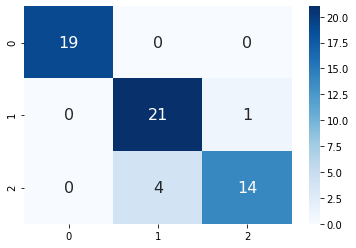

In [45]:
# Rezultati predikcije
acc_gnb = accuracy_score(y_test, y_pred_gnb)
print('Tačnost predikcije je: ', acc_gnb)

# Plotovanje konfuzione matrice
conf_mat_gnb = confusion_matrix(y_test, y_pred_gnb)
conf_mat_gnb_df = pd.DataFrame(conf_mat_gnb)
sn.heatmap(conf_mat_gnb_df, annot=True, annot_kws={"size": 16}, cmap = 'Blues') 

## Prikaz rezultata svih klasifikatora

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


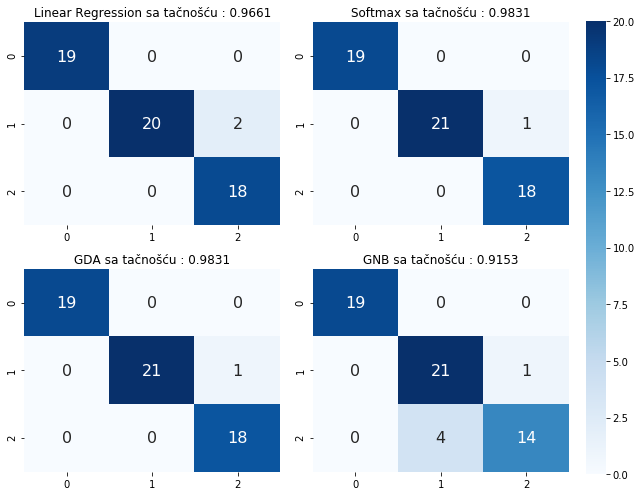

In [46]:
df = [conf_mat_lr_df, conf_mat_soft_df, conf_mat_gda_df, conf_mat_gnb_df]
acc = [acc_lr, acc_soft, acc_gda, acc_gnb]

fig, axn = plt.subplots(2, 2, figsize = (9, 7))
cbar_ax = fig.add_axes([.91, .05, .03, 0.9])
titles = ['Linear Regression', 'Softmax', 'GDA', 'GNB']

for i, ax in enumerate(axn.flat):
    sn.heatmap(df[i], ax=ax, cbar=i == 0,
                cbar_ax=None if i else cbar_ax,
                cmap = 'Blues', annot_kws={"size": 16}, annot=True)
    ax.title.set_text(titles[i]+ ' sa tačnošću : ' + str(round(acc[i],4)))

fig.tight_layout(rect=[0, 0, 0.9, 1])